In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dheerajperumandla/drowsiness-dataset
!ls

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 161M/161M [00:01<00:00, 97.8MB/s]

drowsiness-dataset.zip	kaggle.json  sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('drowsiness-dataset.zip', 'r')
zip_ref.extractall('new')
zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train = '/content/new/train/'


In [ ]:
for expression in os.listdir(train):
    print(str(len(os.listdir(train + expression))) + " " + expression + " images")

726 Open images
725 no_yawn images
723 yawn images
726 Closed images


_323.jpg
_505.jpg
_549.jpg
_143.jpg
_522.jpg
_323.jpg
_505.jpg
_549.jpg
_143.jpg
_522.jpg
2410.jpg
2296.jpg
237.jpg
2129.jpg
2354.jpg
121.jpg
611.jpg
164.jpg
172.jpg
237.jpg


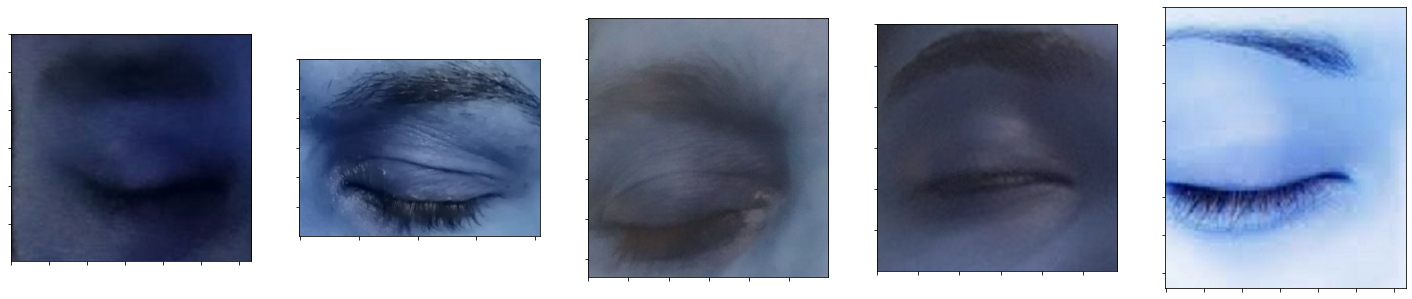

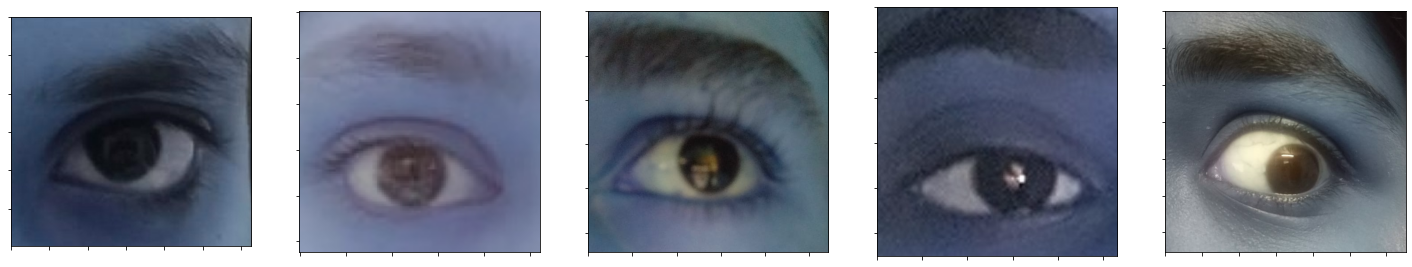

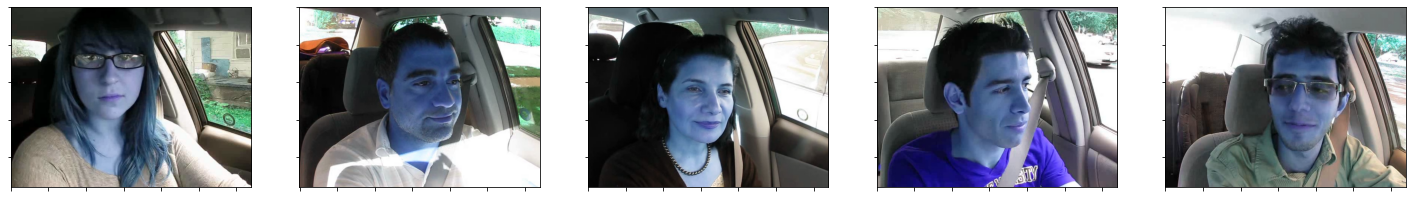

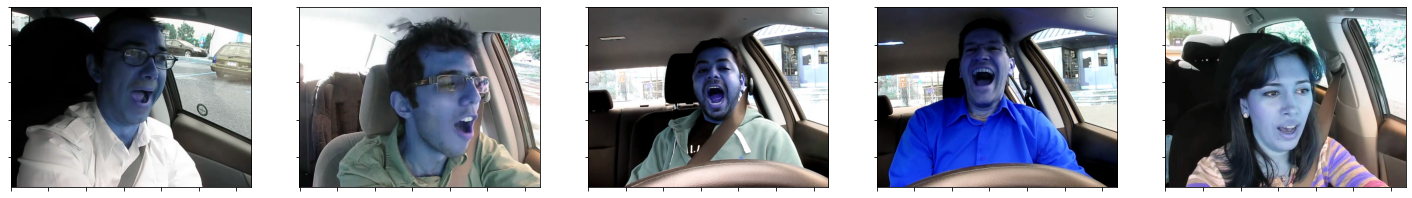

In [ ]:
def plot_examples(folder_names, selected_folder, train):    
    
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    #fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    file_names = os.listdir(train + '/' + selected_folder)
    for i in range(5):
        print(file_names[i])
        img = cv2.imread(train + '/' + selected_folder + '/' + file_names[i])
        axs[i].imshow(img)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
plot_examples(os.listdir(train),'Closed', train)        
plot_examples(os.listdir(train),'Open', train)
plot_examples(os.listdir(train),'no_yawn', train)
plot_examples(os.listdir(train),'yawn', train)


In [ ]:
# preprocess data
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   horizontal_flip=True,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   validation_split=0.2)

train_data = train_datagen.flow_from_directory(train,
                                               batch_size=16,
                                               target_size=(128, 128),
                                               color_mode='grayscale',
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset="training")
valid_data = train_datagen.flow_from_directory(train,
                                               batch_size=16,
                                               target_size=(128, 128),
                                               color_mode='grayscale',
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset="validation")

Found 2321 images belonging to 4 classes.
Found 579 images belonging to 4 classes.


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Initialising the Model
model = Sequential()

# 1 - Convolution
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPool2D(2))

# 2nd Convolution layer
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D(2))

# 3rd Convolution layer
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPool2D(2))


# 4th Convolution layer
model.add(Conv2D(128, 3,padding='same', activation='relu'))
model.add(MaxPool2D(2))

# Flattening
model.add(Flatten())


# Fully connected layer 
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))

# model compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [ ]:
history = model.fit(train_data,
                    epochs=10,
                    validation_data=valid_data)

Epoch 1/10
146/146 [==============================] - 42s 223ms/step - loss: 0.9449 - accuracy: 0.5179 - val_loss: 0.7025 - val_accuracy: 0.6028
Epoch 2/10
146/146 [==============================] - 20s 134ms/step - loss: 0.5736 - accuracy: 0.7204 - val_loss: 0.6718 - val_accuracy: 0.6287
Epoch 3/10
146/146 [==============================] - 21s 142ms/step - loss: 0.4997 - accuracy: 0.7462 - val_loss: 0.5184 - val_accuracy: 0.7461
Epoch 4/10
146/146 [==============================] - 19s 132ms/step - loss: 0.4449 - accuracy: 0.7617 - val_loss: 0.4874 - val_accuracy: 0.7081
Epoch 5/10
146/146 [==============================] - 21s 141ms/step - loss: 0.4248 - accuracy: 0.7798 - val_loss: 0.5013 - val_accuracy: 0.6891
Epoch 6/10
146/146 [==============================] - 19s 134ms/step - loss: 0.4053 - accuracy: 0.7820 - val_loss: 0.6612 - val_accuracy: 0.6563
Epoch 7/10
146/146 [==============================] - 19s 132ms/step - loss: 0.3944 - accuracy: 0.7820 - val_loss: 0.4853 - val_ac

In [ ]:
res = model.predict(valid_data)
y_test = valid_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       145
           1       0.96      0.91      0.93       145
           2       0.58      0.66      0.62       145
           3       0.60      0.53      0.56       144

    accuracy                           0.76       579
   macro avg       0.76      0.76      0.76       579
weighted avg       0.76      0.76      0.76       579



In [ ]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(128, 128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))




In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)      

In [ ]:
history = model.fit(train_data,
                    epochs=27,
                    validation_data=valid_data)

Epoch 1/27
146/146 [==============================] - 27s 165ms/step - loss: 0.8413 - accuracy: 0.5950 - val_loss: 7.0860 - val_accuracy: 0.2504
Epoch 2/27
146/146 [==============================] - 23s 155ms/step - loss: 0.6420 - accuracy: 0.6907 - val_loss: 6.7497 - val_accuracy: 0.2504
Epoch 3/27
146/146 [==============================] - 23s 155ms/step - loss: 0.5845 - accuracy: 0.7087 - val_loss: 5.8604 - val_accuracy: 0.3506
Epoch 4/27
146/146 [==============================] - 22s 152ms/step - loss: 0.5273 - accuracy: 0.7406 - val_loss: 1.4629 - val_accuracy: 0.5354
Epoch 5/27
146/146 [==============================] - 22s 154ms/step - loss: 0.4683 - accuracy: 0.7682 - val_loss: 0.5580 - val_accuracy: 0.7098
Epoch 6/27
146/146 [==============================] - 23s 155ms/step - loss: 0.4799 - accuracy: 0.7617 - val_loss: 0.7058 - val_accuracy: 0.6684
Epoch 7/27
146/146 [==============================] - 22s 152ms/step - loss: 0.4297 - accuracy: 0.7816 - val_loss: 0.5659 - val_ac

In [ ]:
res = model.predict(valid_data)
y_test = valid_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       145
           1       0.99      0.91      0.95       145
           2       0.76      0.82      0.79       145
           3       0.81      0.74      0.77       144

    accuracy                           0.86       579
   macro avg       0.87      0.86      0.86       579
weighted avg       0.87      0.86      0.86       579



In [ ]:
model_json = model.to_json()
with open('modeln.json', "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save('modeln.h5')